In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def sum_of_lambd(_lambd, _K):
    sum = 0
    for i in range(3, _K+1):
        sum += _lambd ** i
    return sum

In [3]:
def cost_func(_rho, _gamma, _sigma, _mu1, _mu2, _p, _K):
    a0 = ((_rho / _sigma) ** 2) + (_mu1 + _mu2) * _rho / _sigma + _mu1 * _mu2
    a1 = -2 * ((_rho / _sigma) ** 2) - (_mu1 + _mu2) * _rho / _sigma
    a2 = (_rho / _sigma) ** 2
    b0 = (1 - _p) * _mu1 * (_rho / _sigma) + _mu1 * _mu2
    b1 = -((_rho / _sigma) ** 2) - ((2 - _p) * _mu1 + _mu2) * (_rho / _sigma) - _mu1 * _mu2
    b2 = 2 * ((_rho / _sigma) ** 2) + (_mu1 + _mu2) * (_rho / _sigma)
    b3 = -((_rho / _sigma) ** 2)
    alpha2 = a0 / b0
    alpha3 = a1 / b0 - a0 * b1 / (b0 ** 2)
    alpha4 = a2 / b0 - a1 * b1 / (b0 ** 2) + a0 * (b1 ** 2) / (b0 ** 3) - (a0 * b2) / (b0 ** 2)
    lambd1 = (-(b0 + b1) + math.sqrt((b0 + b1)**2 + 4 * b0 * b3)) / (2 * b0)
    lambd2 = (-(b0 + b1) - math.sqrt((b0 + b1)**2 + 4 * b0 * b3)) / (2 * b0)
    d1 = (lambd2 * (alpha3 - alpha2) - (alpha4 - alpha3)) / ((lambd1 ** 3) * (lambd2 - lambd1))
    d2 = (alpha4 - alpha3 - lambd1 * (alpha3 - alpha2)) / ((lambd2 ** 3) * (lambd2 - lambd1))
    alpha_K = alpha2 + d1 * sum_of_lambd(lambd1, _K) + d2 * sum_of_lambd(lambd2, _K)
    return 1 + ((_gamma - alpha_K) / (1 + _rho * alpha_K))

In [4]:
def bisection(_a, _b, gamma_, mu1_, mu2_, p_, K_, sigma_):
    eps = 0.001
    while(abs(_b - _a) > eps):
        x = (_a + _b) / 2
        C1 = cost_func(x - eps, gamma_, sigma_, mu1_, mu2_, p_, K_)
        C2 = cost_func(x + eps, gamma_, sigma_, mu1_, mu2_, p_, K_)
        if (C1 < C2):
            _b = x
        else:
            _a = x
    return x

# Метод анализа

rho[ 0 ] =  0.2
C[ 0 ] =  1.6000000000051857
rho[ 1 ] =  0.29285714285714287
C[ 1 ] =  1.4142857163135958
rho[ 2 ] =  0.38571428571428573
C[ 2 ] =  1.228571584511018
rho[ 3 ] =  0.4785714285714286
C[ 3 ] =  1.0428618489757406
rho[ 4 ] =  0.5714285714285714
C[ 4 ] =  0.8572190957585877
rho[ 5 ] =  0.6642857142857144
C[ 5 ] =  0.6722070866939694
rho[ 6 ] =  0.7571428571428571
C[ 6 ] =  0.49114387857153363
rho[ 7 ] =  0.8500000000000001
C[ 7 ] =  0.3265826836770539
rho[ 8 ] =  0.9428571428571428
C[ 8 ] =  0.20562905141411802
rho[ 9 ] =  1.0357142857142858
C[ 9 ] =  0.1524031989164032
rho[ 10 ] =  1.1285714285714286
C[ 10 ] =  0.1592126394083342
rho[ 11 ] =  1.2214285714285713
C[ 11 ] =  0.19737611925627263
rho[ 12 ] =  1.3142857142857143
C[ 12 ] =  0.24471352915236777
rho[ 13 ] =  1.4071428571428573
C[ 13 ] =  0.2912948216157534
rho[ 14 ] =  1.5
C[ 14 ] =  0.33403509745541227


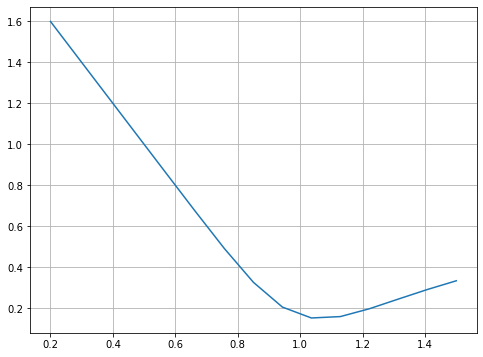

In [5]:
mu1 = 0.5
mu2 = 0.1
p = 1
gamma = 2
K = 15
sigma = 1 / mu1 + p / mu2
rho = np.linspace(0.2, 1.5, 15)
C = np.zeros(15)
for i in range(0, 15):
    C[i] = cost_func(rho[i], gamma, sigma, mu1, mu2, p, K)
    print("rho[", i, "] = ",  rho[i])
    print("C[", i, "] = ",  C[i])
plt.figure(figsize=(8, 6))
plt.plot(rho, C)
plt.grid(True)
#plt.xlabel('rho')
#plt.ylabel('C (rho,gamma,K)')
plt.show()

# Метод оптимизации

In [7]:
#mu1 = 5
p = 1
gamma = 0.5
K = 5#np.linspace(2, 100, 99, dtype=int)
sigma = 1 / mu1 + p / mu2
rho = np.zeros(99)
C = np.zeros(99)
for i in range(0, 99):
    rho[i] = bisection(0, 10, gamma, mu1, mu2, p, K[i], sigma)
    C[i] = cost_func(rho[i], gamma, sigma, mu1, mu2, p, K[i])
print(K)
print(rho)
plt.figure(figsize=(9, 3))
plt.plot(K, rho)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('rho')
plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15